# Rice Leaf Prediction

<img src="Rice_leaf_image.png" width="">

# Contents

* PROBLEM STATMENT
* DOMAIN ANALYSIS REPORT
* IMPORTING AND RESCALING DATASET
* DATA ANALYSIS REPORT
* VISUALIZING THE FIRST 36 TRAINING IMAGES
* RESCALING THE IMAGES
* BREAKING INTO TRAINING, TESTING AND VALIDATION SET
* DATA AUGMENTATION
* DEFINING THE MODEL ARCHITECTURE
* COMPILE THE MODEL 
* TRAIN THE MODEL
* LOAD THE MODEL WITH BEST VALIDITY ACCURACY
* VISUALIZE SOME PREDICTION
* EVALUATE ACCURACY
  - CNN
  - Support Vector Machine
  - Logistic Regression
  - K-Nearest Neighbor
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - Xtreme Gradient Boost
* MODEL COMPARISION REPORT
* CHALLENGES FACED
* CONCLUSION

# Problem Statement

##### Task 1:-Prepare a complete data analysis report on the given data.

##### Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

##### Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


# Domain Analysis Report 
##### Disease Detection: 
Rice leaf prediction often refers to the identification and classification of diseases affecting rice plants based on the analysis of images of rice leaves.

##### Pest Detection: 
In addition to diseases, prediction models may also focus on identifying pests that affect rice crops.

##### Importance:
Early detection of diseases and pests in rice crops is crucial for farmers to take timely action and prevent significant yield losses.

##### Environmental Variability: 
Variations in environmental conditions can impact the appearance of healthy and diseased leaves.

##### Farm Management: 
Farmers can use prediction models as decision support tools for managing crop health.

##### Explainability: 
Developing models that provide interpretable results to build trust among users.



In [3]:
pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import warnings
warnings.filterwarnings('ignore')

# Importing and Rescaling Dataset

In [84]:
import cv2
import os
import numpy as np

# Specify the paths to the directories where you want to extract the images
extracted_directory1 = r"C:\Users\KIRAN\Rice_Leaf_Data\Bacterial leaf blight"
extracted_directory2 = r"C:\Users\KIRAN\Rice_Leaf_Data\Brown spot"
extracted_directory3 = r"C:\Users\KIRAN\Rice_Leaf_Data\Leaf smut"

# Function to load images from a directory
def load_images(directory, output_label):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png', '.JPG'))]
    images = []
    labels = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            # Preprocess the image (resize, normalize, etc.)
            # You may need to adjust preprocessing based on your specific requirements
            image = cv2.resize(image, (224, 224))
            image = image / 255.0  # Normalize pixel values to the range [0, 1]
            
            # Append the preprocessed image and its label to the lists
            images.append(image)
            labels.append(output_label)
    
    return np.array(images), np.array(labels)

# Load and preprocess images for each category
images1, labels1 = load_images(extracted_directory1, 0)
images2, labels2 = load_images(extracted_directory2, 1)
images3, labels3 = load_images(extracted_directory3, 2)

# Combine all images and labels into arrays
all_images = np.concatenate([images1, images2, images3], axis=0)
all_labels = np.concatenate([labels1, labels2, labels3], axis=0)

# Now, you can use train_images, train_labels, test_images, and test_labels directly
# for training and testing your CNN model.


In [85]:
all_images

array([[[[0.82352941, 0.84313725, 0.89803922],
         [0.81568627, 0.83921569, 0.89019608],
         [0.81960784, 0.83137255, 0.89019608],
         ...,
         [0.82352941, 0.84313725, 0.90196078],
         [0.82745098, 0.85098039, 0.90196078],
         [0.82745098, 0.84705882, 0.89803922]],

        [[0.81568627, 0.83921569, 0.88627451],
         [0.81568627, 0.83921569, 0.89019608],
         [0.82352941, 0.83921569, 0.89803922],
         ...,
         [0.82352941, 0.84313725, 0.90196078],
         [0.81960784, 0.84313725, 0.89411765],
         [0.82352941, 0.84313725, 0.90588235]],

        [[0.81960784, 0.83921569, 0.89411765],
         [0.81960784, 0.83921569, 0.89411765],
         [0.81568627, 0.83529412, 0.90196078],
         ...,
         [0.81960784, 0.84313725, 0.89411765],
         [0.82352941, 0.84705882, 0.89803922],
         [0.82745098, 0.84313725, 0.91372549]],

        ...,

        [[0.82352941, 0.84705882, 0.89803922],
         [0.81176471, 0.84313725, 0.89411765]

In [86]:
all_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
unique_classes, class_counts = np.unique(all_labels, return_counts=True)

# Print the unique classes and their counts
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} instances")


Class 0: 40 instances
Class 1: 40 instances
Class 2: 39 instances


* First dataset of Bacterial leaf blight contains 40 images.
* Second dataset of Brown spot contains 40 images.
* Third dataset of Leaf smut contains 39 images.

In [102]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

In [103]:
X_train.shape

(95, 224, 224, 3)

In [104]:
y_train.shape

(95,)

In [105]:
X_test.shape

(24, 224, 224, 3)

In [106]:
y_test.shape

(24,)

In [107]:
X_train

array([[[[0.28627451, 0.68627451, 0.85490196],
         [0.14117647, 0.63529412, 0.78823529],
         [0.10588235, 0.53333333, 0.6745098 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.12156863, 0.54901961, 0.69803922],
         [0.03137255, 0.49411765, 0.63137255],
         [0.02745098, 0.40392157, 0.52941176],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.03921569, 0.48627451, 0.6       ],
         [0.01960784, 0.45098039, 0.55686275],
         [0.09019608, 0.43529412, 0.51372549],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [108]:
y_train

array([1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       1, 1, 2, 0, 2, 1, 2])

# Visulaizing First 36 Training Images

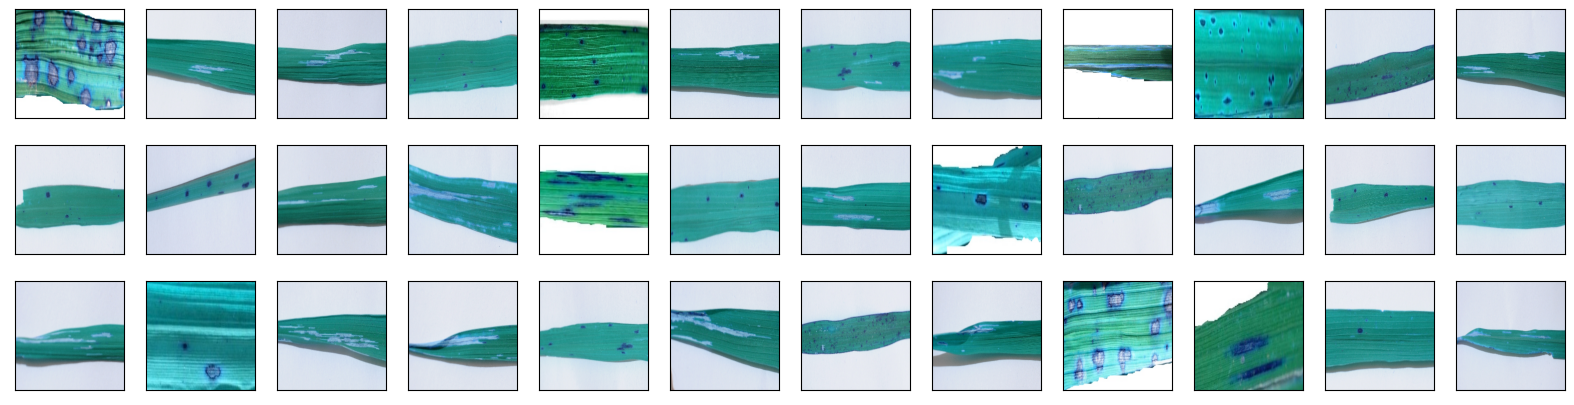

In [109]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

# Breaking into training, testing, and validation set.

In [110]:
from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

# break training set into training and validation sets
(X_train, X_valid) = X_train[:76], X_train[76:]
(y_train, y_valid) = y_train[:76], y_train[76:]

# print shape of training set
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (76, 224, 224, 3)
76 train samples
24 test samples
19 validation samples


* Training set: 80% of 95 images (76 images)
* Validation set: 20% of 95 images (19 images)

In [111]:
X_valid.shape

(19, 224, 224, 3)

In [112]:
y_valid.shape

(19, 3)

In [113]:
X_train.shape

(76, 224, 224, 3)

In [114]:
y_train.shape

(76, 3)

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Randomly zoom in/out on images
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels after rotation or shifting
)

datagen.fit(X_train)

# Defining the model architecture 

In [126]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Create a model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 28, 28, 64)       

# Compile the model

In [127]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [132]:
# Train the model with augmented data
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
3/3 [==============================] - 3s 1s/step - loss: 0.7994 - accuracy: 0.6053 - val_loss: 0.9618 - val_accuracy: 0.6842
Epoch 2/50
3/3 [==============================] - 2s 614ms/step - loss: 0.8358 - accuracy: 0.6053 - val_loss: 0.8353 - val_accuracy: 0.6842
Epoch 3/50
3/3 [==============================] - 2s 629ms/step - loss: 0.8130 - accuracy: 0.6053 - val_loss: 0.9963 - val_accuracy: 0.6316
Epoch 4/50
3/3 [==============================] - 2s 624ms/step - loss: 0.7867 - accuracy: 0.6711 - val_loss: 1.0167 - val_accuracy: 0.6316
Epoch 5/50
3/3 [==============================] - 2s 839ms/step - loss: 0.7797 - accuracy: 0.6447 - val_loss: 0.8667 - val_accuracy: 0.5789
Epoch 6/50
3/3 [==============================] - 2s 564ms/step - loss: 0.8632 - accuracy: 0.5789 - val_loss: 0.8794 - val_accuracy: 0.5263
Epoch 7/50
3/3 [==============================] - 2s 559ms/step - loss: 0.9020 - accuracy: 0.5132 - val_loss: 0.8524 - val_accuracy: 0.6842
Epoch 8/50
3/3 [=======

# Load the model with best validity accuracy

In [135]:
model.load_weights('model.weights.best.hdf5')  # This will raise the ValueError


In [139]:
# get predictions on the test set
y_hat = model.predict(X_test)

rice_leaf_labels = ['Bacterial_eaf','Brown_spot','Leaf_smut']

1/1 [==============================] - 0s 145ms/step


In [140]:
X_test.shape

(24, 224, 224, 3)

# Visualize some prediction

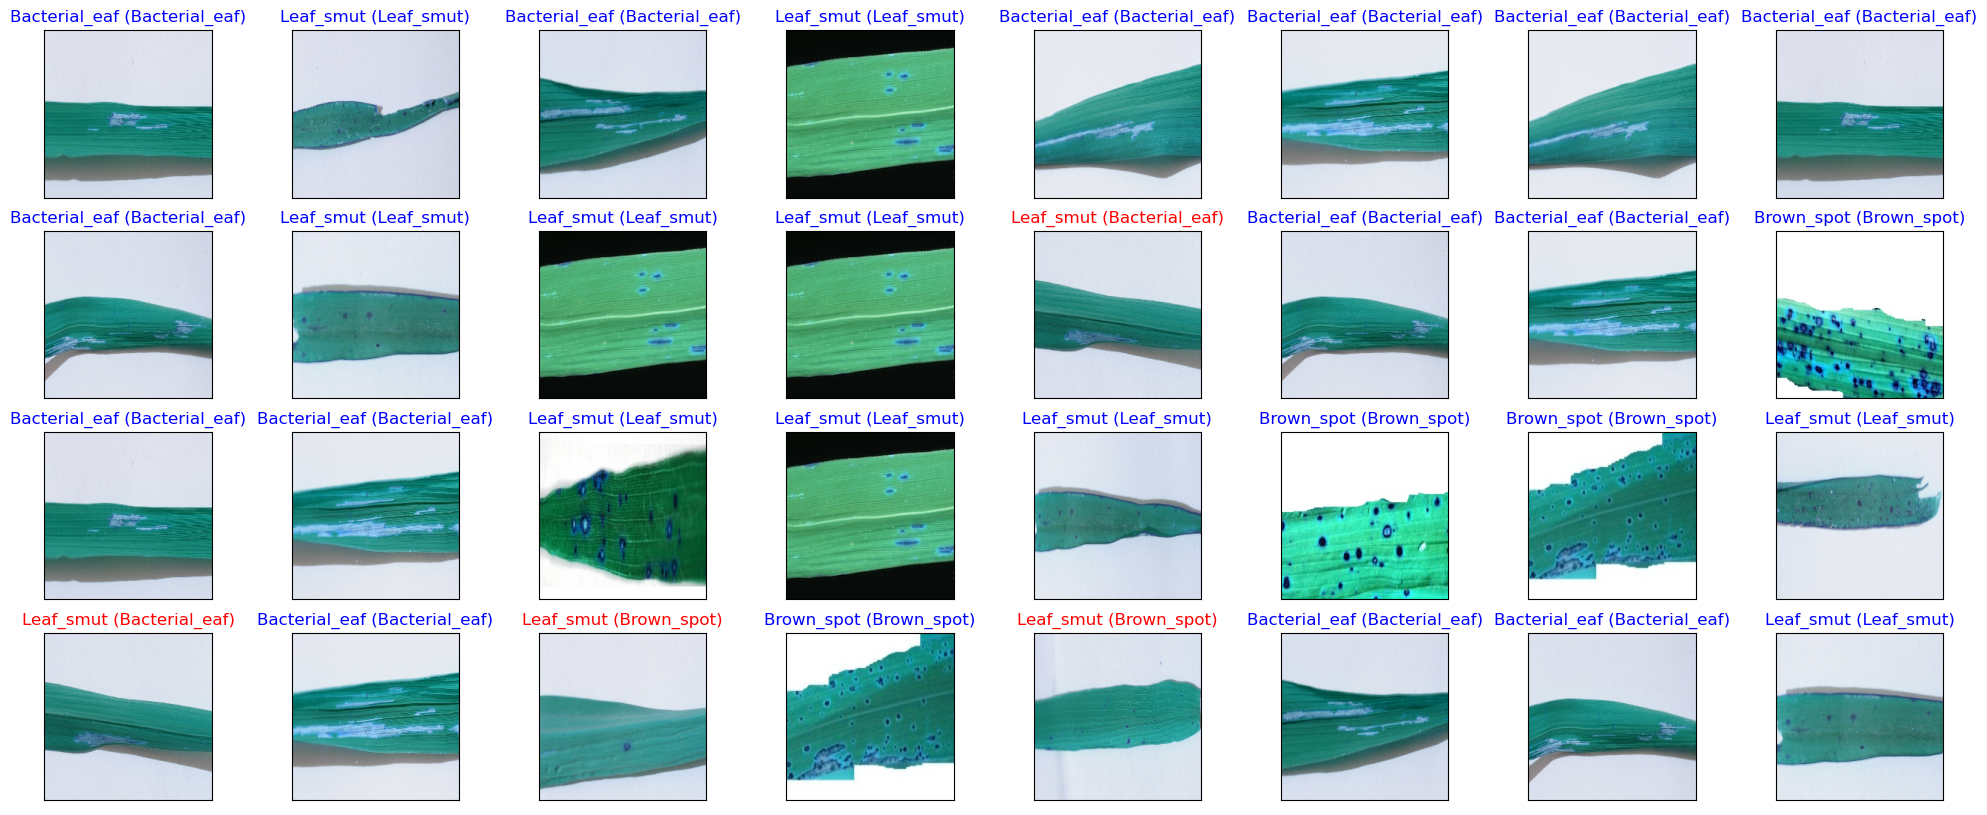

In [146]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(25, 10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(rice_leaf_labels[pred_idx], rice_leaf_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# Evaluate Accuracy

## CNN

In [149]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.5f%%' % accuracy)

[0.5137062072753906, 0.75]
Test accuracy: 75.00000%


## Support Vector Machine

In [152]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Reshape the images to a 2D array (flatten)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert them to single-column labels
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Create the SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  70.83333333333334 %
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.62      1.00      0.76         8
           2       0.80      0.44      0.57         9

    accuracy                           0.71        24
   macro avg       0.75      0.72      0.70        24
weighted avg       0.75      0.71      0.69        24



# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  70.83333333333334 %
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.67      1.00      0.80         8
           2       0.71      0.56      0.63         9

    accuracy                           0.71        24
   macro avg       0.73      0.71      0.70        24
weighted avg       0.72      0.71      0.70        24



# K-Nearest Neighbor

In [155]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  45.83333333333333 %
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.43      0.75      0.55         8
           2       0.50      0.33      0.40         9

    accuracy                           0.46        24
   macro avg       0.48      0.46      0.44        24
weighted avg       0.48      0.46      0.44        24



# Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  58.333333333333336 %
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.62      0.56         8
           2       0.62      0.56      0.59         9

    accuracy                           0.58        24
   macro avg       0.60      0.58      0.59        24
weighted avg       0.60      0.58      0.59        24



# Random forest Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  62.5 %
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.50      0.50         8
           2       0.86      0.67      0.75         9

    accuracy                           0.62        24
   macro avg       0.64      0.63      0.62        24
weighted avg       0.65      0.62      0.63        24



# Gradient Boosting

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  58.333333333333336 %
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.58      0.88      0.70         8
           2       0.75      0.67      0.71         9

    accuracy                           0.58        24
   macro avg       0.53      0.56      0.53        24
weighted avg       0.55      0.58      0.55        24



# XGBoost

In [159]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  75.0 %
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.86      0.75      0.80         8
           2       0.69      1.00      0.82         9

    accuracy                           0.75        24
   macro avg       0.77      0.73      0.72        24
weighted avg       0.76      0.75      0.73        24



# Model Comparison Report

* CNN :- 75.00 %


* Logistic Regression :- 70.83 %


* Support Vector Machine :- 70.83 %


* K-Nearest Neighbor :- 45.83 %


* Decision Tree Classifier :- 58.33 %


* Random Forest Classifier :- 62.50 %


* Gradient Boosting :- 58.33 %


* XGBoost :- 75.00 %


##### The best accuracy is given by the CNN (Convolution Neural Network) i.e. 75.00 %

# Challenges Faced

Inconsistent case usage (.jpg and .JPG) introduces complexity in maintaining a standardized image dataset, leading to potential errors, data integration challenges, and impacts on user experience. 

# Conclusion

In conclusion, the Convolutional Neural Network (CNN) demonstrated superior performance in terms of accuracy, achieving a commendable 75.00% on the rice leaf disease dataset. This outcome suggests that CNNs are effective in handling the complexities of the data, despite the reported difficulty in processing it. The success of CNNs in this context highlights their capability to capture intricate patterns and features within the dataset, making them a suitable choice for image-based classification tasks such as identifying diseases in rice leaves. Despite the challenges in data processing, the CNN model proved to be robust and yielded the best results, emphasizing its potential for accurate classification in similar domains.

# Thank you for taking the time to review this project.

Best regards,

Vinay D Gaikwad